# Discrete lab 
Kruskal, Prim tree algorithms

Floyd-Warshall, Bellman-Ford algorithms
 
Contributors:
    Severyn Shykula
    David Ilnytskyi

In [76]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [77]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import heapq
#networkx algorithms
from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

# Part1
We implemented both algorithms - Prim and Kruskal

# Kruskal algorithm

In [78]:
def kruskal_algorithm(G):
    list_of_edges=list(G.edges(data=True))
    list_of_edges.sort(key=lambda x: x[2]['weight'])
    divide_list=[]
    karkas=[]
    sum_of_edges=0
    def search_in(list_0,elem):
        for i in range(len(list_0)):
            if elem in list_0[i]:
                return i
        return -1

    for edge in list_of_edges:
        a=search_in(divide_list, edge[0])
        b=search_in(divide_list, edge[1])
        if a==b and a!=-1:
            continue
        elif a==-1 and b==-1:
            divide_list.append([edge[0],edge[1]])
        elif a==-1:
            divide_list[b].append(edge[0])
        elif b==-1:
            divide_list[a].append(edge[1])
        else:
            divide_list[a]+=divide_list[b]
            divide_list[b]=[]
        sum_of_edges+=edge[2]['weight']
        karkas.append((edge[0],edge[1]))
    return karkas

# Prim algorithm

In [79]:
def prim_algorithm(G):    
    list_of_edges=list(G.edges(data=True))
    list_of_edges.sort(key=lambda x: x[2]['weight'])
    visited_list=[1]
    karkas=[]
    sum_of_edges=0
    while len(karkas)!=len(G.nodes) -1:
        for edge in list_of_edges:
            if edge[0] not in visited_list and edge[1] not in visited_list:
                continue
            if edge[0] in visited_list and edge[1] in visited_list:
                continue
            if edge[0] in visited_list:
                visited_list.append(edge[1])
                sum_of_edges+=edge[2]['weight']
                karkas.append((edge[0],edge[1]))
                break
            elif edge[1] in visited_list:
                visited_list.append(edge[0])
                sum_of_edges+=edge[2]['weight']
                karkas.append((edge[0],edge[1]))
                break
    return karkas

So now we will compare prim and kruskal algorithms

This is generator of graph:

In [80]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(1, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

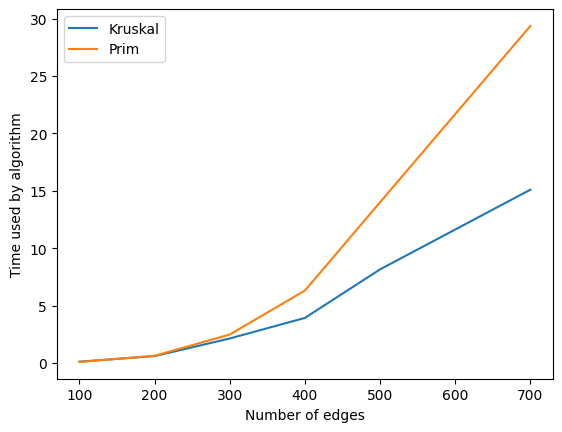

In [81]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [100,200,300,400,500,700]
for edges_num in test_nums:
    prim_time = 0
    kr_time = 0
    for _ in range(5):
        G=gnp_random_connected_graph(edges_num, 0.5)
        time_1=time.time()
        kr_karkas = kruskal_algorithm(G)
        time_2=time.time()
        prim_karkas = prim_algorithm(G)
        time_3=time.time()
        kr_time += time_2 - time_1
        prim_time += time_3 - time_2
        # checks if our algorithm works well, note you shoul change for kruskal and prim
        #mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")
        #if not sorted(mstk.edges())==sorted(our_karkas):
        #    print('Error',edges_num,sorted(mstk.edges()),sorted(our_karkas))
    results_0.append(kr_time)
    results_1.append(prim_time)

plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Number of edges')
plt.ylabel('Time used by algorithm')
plt.legend(['Kruskal','Prim'])


As we can see kruskal algorithm is better here but it's bad implementation. Now we will try with heapq

In [82]:
def kruskal_heap(G):
    list_of_edges=list(G.edges(data=True))
    for elem in range(len(list_of_edges)):
        list_of_edges[elem] = list_of_edges[elem][2]['weight'] , list_of_edges[elem][0] , list_of_edges[elem][1]
    #import heapq
    heapq.heapify(list_of_edges)
    divide_list=[]
    karkas=[]
    sum_of_edges=0

    def search_in(list_0,elem):
        for i in range(len(list_0)):
            if elem in list_0[i]:
                return i
        return -1
    sum_of_edges=0
    while len(karkas)!=len(G.nodes)-1:

        edge=heapq.heappop(list_of_edges)
        a=search_in(divide_list, edge[1])
        b=search_in(divide_list, edge[2])
        if a==b and a!=-1:
            continue
        elif a==-1 and b==-1:
            divide_list.append([edge[1],edge[2]])
        elif a==-1:
            divide_list[b].append(edge[1])
        elif b==-1:
            divide_list[a].append(edge[2])
        else:
            divide_list[a]+=divide_list[b]
            divide_list[b]=[]
        sum_of_edges+=edge[0]
        karkas.append((edge[1],edge[2]))
    return karkas,sum_of_edges

In [83]:
def prim_heap(G):
    edj=nx.to_dict_of_dicts(G)
    #import heapq
    list_of_edges=[]
    heapq.heapify(list_of_edges)
    visited_list=[1]
    karkas=[]
    sum_of_edges=0
    def add_to(node,edj):
        for di in edj[node].items(): 
            heapq.heappush(list_of_edges,(di[1]['weight'],di[0],node))
    add_to(1,edj)
    while len(karkas)!=len(G.nodes) -1:
        while True:
            edge = heapq.heappop(list_of_edges)
            edge=edge[1],edge[2],edge[0]
            if edge[0] not in visited_list and edge[1] not in visited_list:
                continue
            if edge[0] in visited_list and edge[1] in visited_list:
                continue
            if edge[0] in visited_list:
                visited_list.append(edge[1])
                sum_of_edges+=edge[2]
                karkas.append((edge[0],edge[1]))
                add_to(edge[1],edj)
                break
            elif edge[1] in visited_list:
                visited_list.append(edge[0])
                sum_of_edges+=edge[2]
                karkas.append((edge[0],edge[1]))
                add_to(edge[0],edj)
                break
    return karkas,sum_of_edges

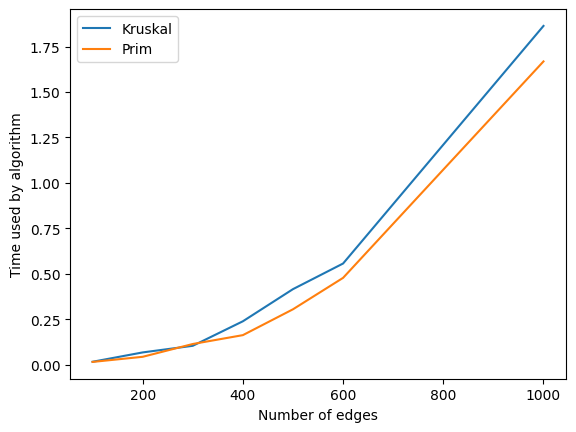

In [84]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [100,200,300,400,500,600,1000]
for edges_num in test_nums:
    prim_time = 0
    kr_time = 0
    for _ in range(10):
        G=gnp_random_connected_graph(edges_num, 0.5)
        time_1=time.time()
        kr, sum_kr=kruskal_heap(G)
        #a=tree.minimum_spanning_tree(G,algorithm='kruskal')
        time_2=time.time()
        #a=tree.minimum_spanning_tree(G,algorithm='prim')
        pr, sum_pr=prim_heap(G)
        time_3=time.time()
        kr_time += time_2 - time_1
        prim_time += time_3 - time_2
    results_0.append(kr_time/10)
    results_1.append(prim_time/10)
plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Number of edges')
plt.ylabel('Time used by algorithm')
plt.legend(['Kruskal','Prim'])


Prim algorithm is a little bit better (+-10%) than kruskal without big correlation to number of nodes.

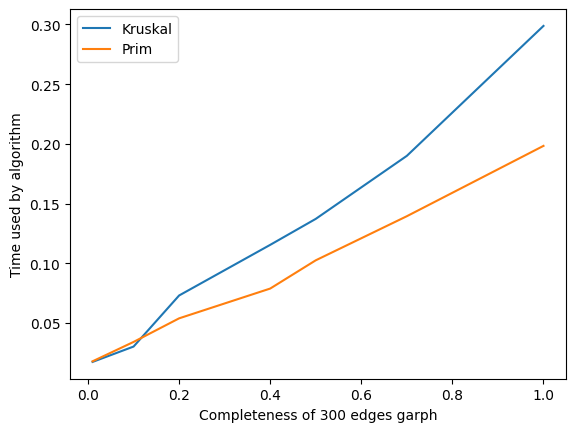

In [85]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [0.01,0.1,0.2,0.4,0.5,0.7,1]
for test_num in test_nums:
    prim_time = 0
    kr_time = 0
    for _ in range(30):
        G=gnp_random_connected_graph(300, test_num)
        time_1=time.time()
        kr, sum_kr=kruskal_heap(G)
        time_2=time.time()
        pr, sum_pr=prim_heap(G)
        time_3=time.time()
        kr_time += time_2 - time_1
        prim_time += time_3 - time_2
    results_0.append(kr_time/30)
    results_1.append(prim_time/30)
plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Completeness of 300 edges garph')
plt.ylabel('Time used by algorithm')
plt.legend(['Kruskal','Prim'])

Kruskal is on par with prim if completeness is low (<0.1). But when completeness is medium or big kruskal becomes way slower.

# Conclusion: 
Prim algorithm is quite faster in every situation. Kruskal is good only with small number of nodes or really small completeness because prim uses only connected to tree edges and works better when there is a big completeness of a graph.

# Graph algorithms
Here we will implement Bellman-Ford and Floyd-Worshall algorithms

In [86]:

def bellmanford(weights):
    predecessor = dict()
    distance = dict()
    all_nodes = list(set([a[0] for a in weights] + [a[1] for a in weights]))
    graph = {number: {} for number in range(max(all_nodes) + 1)}
    # Convert list of tuples into a dict of dictionaries
    for edge in weights:
        graph[edge[0]][edge[1]] = edge[2]["weight"]
    for node in graph:
        distance[node] = float('inf')
        predecessor[node] = None
    distance[0] = 0
    # Main algorithm
    queue=[0]
    queue_1=set([0])
    for iteration in range(len(graph)-1):
        queue=list(queue_1)
        k=0
        for node in queue:
            for neighbour in graph[node]:
                if (distance[neighbour] > distance[node] + graph[node][neighbour]):
                    k=1
                    distance[neighbour] = distance[node] + graph[node][neighbour]
                    predecessor[neighbour] = node
                    queue_1=queue_1.union({neighbour})
        if k==0:
            break
    # Check for negative cycles
    for node in graph:
        for neighbour in graph[node]:
            if distance[neighbour] > distance[node] + graph[node][neighbour]:
                raise ValueError("Graph contains a negative cycle")
    return distance


In [87]:
def floydwarshall(graph):
    number_of_nodes = len(G)

    # All weigths that are equal to 0
    # and are not diagonal are being marked as
    # infinity
    for element in range(len(graph)):
        for number in range(len(graph[element])):
            if number != element and graph[element][number] == 0:
                graph[element][number] = float('inf')
    # Algorithm implementation
    for iteration in range(number_of_nodes):
        for line in range(number_of_nodes):
            for column in range(number_of_nodes):
                if graph[line][column] > graph[line][iteration] + graph[iteration][column]:
                    graph[line][column] = graph[line][iteration] + graph[iteration][column]
    # All weights that are higher than 99800 are being marked as inf(infinity)
    for i in range(len(graph)):
        if graph[i][i]!=0:
            raise ValueError('Negative cycle')
    return graph

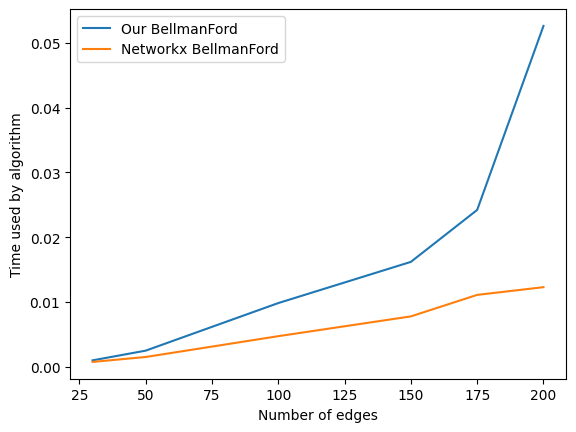

In [88]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [30,50,100,150,175,200]
for edges_num in test_nums:
    nx_time = 0
    our_time = 0
    for _ in range(10):
        G=gnp_random_connected_graph(edges_num, 0.5, True)
        time_1=time.time()
        #B = nx.adjacency_matrix(G, nodelist=None, dtype=None, weight='weight').todense().tolist()
        our=bellmanford(list(G.edges(data=True)))
        time_2=time.time()
        _,nxg=bellman_ford_predecessor_and_distance(G,0)
        time_3=time.time()
        our_time += time_2 - time_1
        nx_time += time_3 - time_2
        """
        code for testing
        delete=[]
        for keys in our.keys():
            if our[keys]== float('inf'):
                delete.append(keys)
        for elem in delete:
            del our[elem]
        if not sorted(nxg.items())==sorted(our.items()):
            print('Error')
        """
    results_0.append(our_time/10)
    results_1.append(nx_time/10)
plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Number of edges')
plt.ylabel('Time used by algorithm')
plt.legend(['Our BellmanFord','Networkx BellmanFord'])

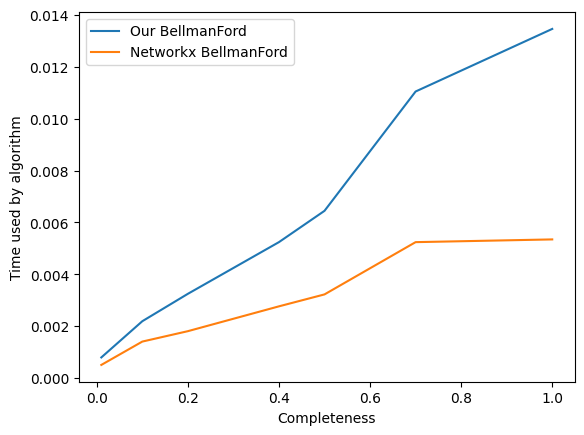

In [89]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [0.01,0.1,0.2,0.4,0.5,0.7,1]
for num in test_nums:
    nx_time = 0
    our_time = 0
    for _ in range(10):
        G=gnp_random_connected_graph(100, num, True)
        time_1=time.time()
        #B = nx.adjacency_matrix(G, nodelist=None, dtype=None, weight='weight').todense().tolist()
        our=bellmanford(list(G.edges(data=True)))
        time_2=time.time()
        _,nxg=bellman_ford_predecessor_and_distance(G,0)
        time_3=time.time()
        our_time += time_2 - time_1
        nx_time += time_3 - time_2
        """
        code for testing
        delete=[]
        for keys in our.keys():
            if our[keys]== float('inf'):
                delete.append(keys)
        for elem in delete:
            del our[elem]
        if not sorted(nxg.items())==sorted(our.items()):
            print('Error')
        """
    results_0.append(our_time/10)
    results_1.append(nx_time/10)
plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Completeness')
plt.ylabel('Time used by algorithm')
plt.legend(['Our BellmanFord','Networkx BellmanFord'])

Our implementation is pretty naive, so that's the reason why our algorithm requires almost 2 times the networkx one.

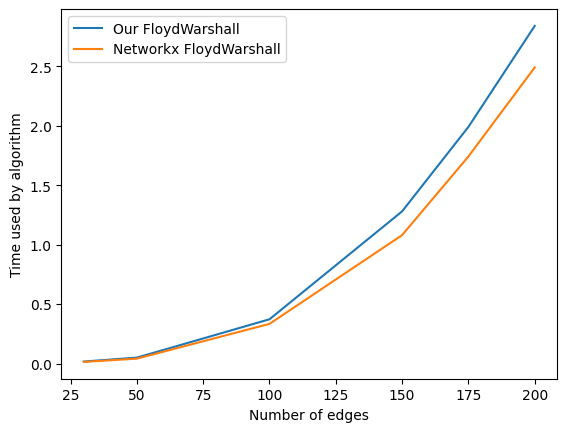

In [90]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [30,50,100,150,175,200]
for edges_num in test_nums:
    nx_time = 0
    our_time = 0
    for _ in range(10):
        G=gnp_random_connected_graph(edges_num, 0.4, True)
        time_1=time.time()
        B = nx.adjacency_matrix(G, nodelist=None, dtype=None, weight='weight').todense().tolist()
        our=floydwarshall(B)
        time_2=time.time()
        _,nxg=floyd_warshall_predecessor_and_distance(G)
        time_3=time.time()
        our_time += time_2 - time_1
        nx_time += time_3 - time_2
        """
        cringe code for testing
        print(nxg[4][17]==our[4][17])
        """
    results_0.append(our_time/10)
    results_1.append(nx_time/10)
plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Number of edges')
plt.ylabel('Time used by algorithm')
plt.legend(['Our FloydWarshall','Networkx FloydWarshall'])

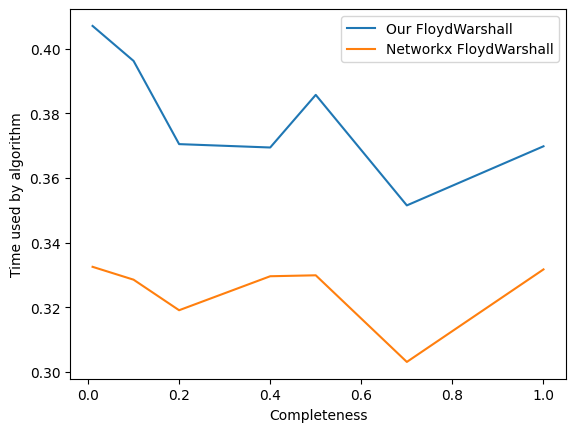

In [91]:
import matplotlib.pyplot as plt
import time
diff=0
results_0 = []
results_1 = []
test_nums = [0.01,0.1,0.2,0.4,0.5,0.7,1]
for num in test_nums:
    nx_time = 0
    our_time = 0
    for _ in range(10):
        G=gnp_random_connected_graph(100, num, True)
        time_1=time.time()
        B = nx.adjacency_matrix(G, nodelist=None, dtype=None, weight='weight').todense().tolist()
        our=floydwarshall(B)
        time_2=time.time()
        _,nxg=floyd_warshall_predecessor_and_distance(G)
        time_3=time.time()
        our_time += time_2 - time_1
        nx_time += time_3 - time_2
        """
        cringe code for testing
        print(nxg[4][17]==our[4][17])
        """
    results_0.append(our_time/10)
    results_1.append(nx_time/10)
plt.figure()
plt.plot(test_nums, results_0, '-',test_nums, results_1, '-')
plt.xlabel('Completeness')
plt.ylabel('Time used by algorithm')
plt.legend(['Our FloydWarshall','Networkx FloydWarshall'])

Our implementation is almost the same as networkx one. FloydWarshall is quite good and doesn't require some complicated data structures.

# Negative check:
As we know both algorithms don't have problems with negative numbers. But they do have problems with negative cycles. To check their behaviour with negative cycles we will create graph with only negative edges:

In [95]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-10, -5)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

Negative cycle check:

In [96]:
G=gnp_random_connected_graph(10, 0.2, True)
B = nx.adjacency_matrix(G, nodelist=None, dtype=None, weight='weight').todense().tolist()
floydwarshall(B)


ValueError: Negative cycle

As we can see floydwarshall identifies negative cycles

In [97]:
bellmanford(list(G.edges(data=True)))

ValueError: Graph contains a negative cycle

And BellmanFord too. So our code works quite well and identifies negative cycles.

# Conclusion:
BellmanFord can be optitmized with use of some new ideas or difficult data structures. Floyd-Warshall is pretty naive to implement so it works as well as networkx one. 

Anyway, both algorithms serves different purpose and we can implement them in real life with our knowledge, got during discrete mathematics classes.